# Análisis de datos LoveMatch

Previo a realizar cualquier descricpción estadística, es necesario manipular los datos obtenidos en el modelo y agente ya que se presenta un problema de pérdida de información.

En primer lugar, al momento de realizar el match, las parejas salen del modelo y del grid. Sin embargo, se llevan con ellos toda la información asociada a sus características. Por lo tanto, la información que necesitamos para comparar entre individuos se va con ellos. 

Sin embargo, es posible recuperar la información sobre quién se emparejó y quién no con la información de la paciencia (time_to_critical) así como la del número de steps sin encontrar pareja (sojourn), si tomamos en cuenta la diferencia entre estas dos variables podemos distinguir quienes dejaron el modelo (time - soj = 1) de aquellos que realizaron su match en su intervalo de paciencia individual (time- - soj != 1).

Para estimar quienes son parejas y quienes se fueron sin match, es necesario agrupar los datos, obtener el valor máximo de sojourn y compararlo con el tiempo crítico. Una vez obtenido esta serie, la agregamos al DataFrame final y con este, ya es posible filtrar quienes tuvieron pareja y quienes no. Con esta información tomada en cuenta, es posible realizar estadística descriptiva para cada grupo.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_rows',5279)

In [ ]:
##### Importar bases de datos para agentes y el modelo ########

In [5]:
info_agentes = pd.read_csv("a_greed.csv")

In [6]:
info_modelo = pd.read_csv("m_greed.csv")

In [134]:
#### Con soj y time encontramos los datos sobre la paciencia y el tiempo máximo de esta por agente (los datos se agruparon) #####

In [7]:
soj = info_agentes.groupby('myid')['sojourn'].max()  

In [8]:
time = info_agentes.groupby('myid')['time_to_critical'].max()

In [ ]:
### La diferencia en el tiempo nos dice si se emparejaron o no. Si es igual a 1, entonces el tiempo que estuvo es igual a su tiempo máximo de espera. #####

In [9]:
par = time - soj

In [96]:
#### Ahora agrupamos el dataframe por agentes para obtener características en un periodo fijo ####

In [10]:
data = info_agentes.groupby(['myid'])[['gender','wealth', 'beauty','desired_beauty','desired_wealth','time_to_critical']]

In [ ]:
#### convertimos el objeto de grouby a dataframe para futuras manipulaciones ####

In [11]:
data = data.first()

In [ ]:
#### agregamos la serie obtenida al dataframe de agentes para poder separar a los individuos emparejados de los solteros#####

In [12]:
df = data.assign(estatus= par) 

In [ ]:
#### Creamos filtros para los distintos tipos de estatus ####

In [13]:
is_single = df['estatus'] == 1

In [14]:
is_match = df['estatus'] != 1

In [ ]:
###### Creamos dos dataframes separados por estatus, una vez aplicado el filtro #######

In [15]:
solteros = df[is_single]

In [16]:
parejas = df[is_match]

In [ ]:
####### ESTADISTICA DESCRIPTIVA #######

In [17]:
solteros.describe()

,gender,wealth,beauty,desired_beauty,desired_wealth,time_to_critical,estatus
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.0
mean,0.510823,2.104430,2.089467,2.847637,2.867709,19.450216,1.0
std,0.500968,0.707449,0.693947,0.916979,0.825517,5.856686,0.0
min,0.000000,0.757205,0.824415,1.385384,1.198086,10.000000,1.0
25%,0.000000,1.651103,1.613326,2.263135,2.280213,14.000000,1.0
50%,1.000000,1.981604,1.984847,2.668567,2.742620,20.000000,1.0
75%,1.000000,2.423372,2.430209,3.355110,3.387190,24.000000,1.0
max,1.000000,5.324615,4.890936,8.446506,5.623239,30.000000,1.0


In [18]:
parejas.describe()

,gender,wealth,beauty,desired_beauty,desired_wealth,time_to_critical,estatus
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.500000,2.236431,2.153460,2.160051,2.417750,18.125000,13.875000
std,0.534522,0.884536,0.552123,0.516237,0.932923,5.667892,6.770472
min,0.000000,1.178750,1.217714,1.329189,1.579714,11.000000,2.000000
25%,0.000000,1.600337,1.936213,1.916183,1.754839,14.750000,10.000000
50%,0.500000,2.017609,2.114734,2.123747,2.024328,16.500000,14.000000
75%,1.000000,2.838307,2.655609,2.306149,2.891872,21.250000,18.250000
max,1.000000,3.779349,2.776123,3.045619,4.235345,29.000000,22.000000


In [19]:
solteros.groupby('gender')['estatus'].count()

gender
0    113
1    118
Name: estatus, dtype: int64

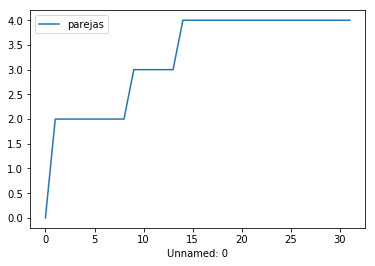

In [29]:
info_modelo.plot(x = 'Unnamed: 0', y = 'parejas')

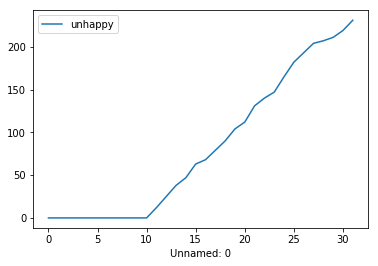

In [30]:
info_modelo.plot(x = 'Unnamed: 0', y = 'unhappy')

C:\Users\edari\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


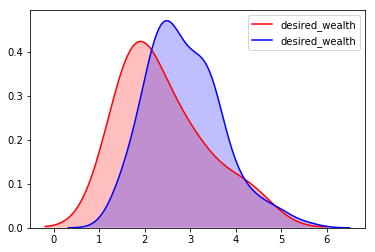

In [21]:
p1 = sns.kdeplot(parejas['desired_wealth'], shade= True, color = 'r')
p2 = sns.kdeplot(solteros['desired_wealth'], shade = True, color = 'b')


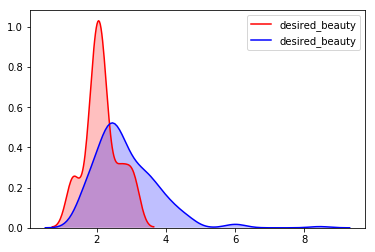

In [22]:
p3 = sns.kdeplot(parejas['desired_beauty'], shade = True, color = 'r')
p4 = sns.kdeplot(solteros['desired_beauty'], shade = True, color = 'b')

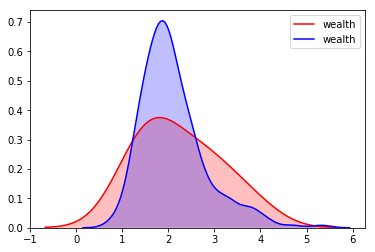

In [23]:
p5 = sns.kdeplot(parejas['wealth'], shade= True, color = 'r')
p6 = sns.kdeplot(solteros['wealth'], shade = True, color = 'b')


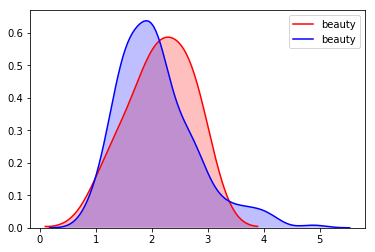

In [24]:
p7 = sns.kdeplot(parejas['beauty'], shade = True, color = 'r')
p8 = sns.kdeplot(solteros['beauty'], shade = True, color = 'b')

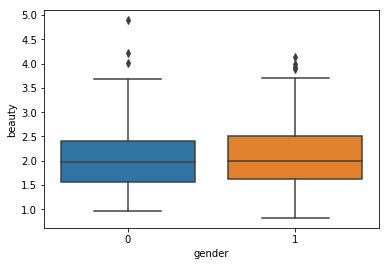

In [25]:
 sns.boxplot(x="gender", y="beauty", data=solteros)

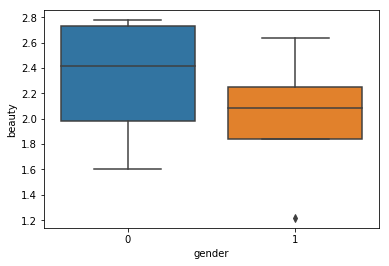

In [26]:
 sns.boxplot(x="gender", y="beauty", data=parejas)

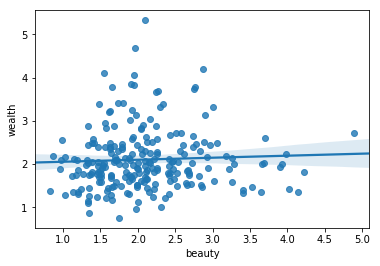

In [27]:
 sns.regplot(x="beauty",
 y="wealth",
 data=solteros)

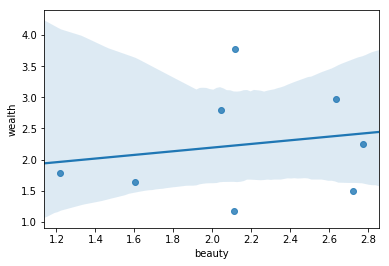

In [28]:
 sns.regplot(x="beauty",
 y="wealth",
 data=parejas)